# Data analyses World Port Index dataset

Date: 31-01-2020 <br>
Concept version: 1.0 <br>
Author: Pieter Lems  <br>

© Copyright 2019 Ministerie van Defensie


## Contents notebook
- World Port Index
  - Import set
  - Show row
  - Show columns
  - Create table
  - Visualize 
  

#### Dataset used in notebook. ("~/GeoStack-Course/Course-Datasets/SHP/World-Port-Index/") This is noted as ("../../../Course-Datasets/SHP/World-Port-Index/") in the notebook.
- World Port Index dataset : ../../../Course-Datasets/SHP/World-Port-Index/WPI.shp

---
## Import required modules
---

In [1]:
import geopandas as gpd
import pandas as pd
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt

---
## Define generic functions

### Function: init_cartopymap():
This function creates a new cartopyMap and then returns the map instance

In [2]:
def init_cartopymap():
    
    plt.figure(figsize = (20, 12))
    
    m = plt.axes(projection=ccrs.PlateCarree())

    m.coastlines(resolution='10m')
    
    m.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
    
    m.add_feature(cfeature.OCEAN)
    
    m.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
    
    m.add_feature(cfeature.RIVERS.with_scale('10m')) 
    
    m.add_feature(cfeature.BORDERS.with_scale('10m'))

    return m 

---
### Function: dfs_on_cartopymap():
This function creates a map and visualizes the inserted dataframes on a CartopyMap

- parameter 1: A list of dataframes, this can also be a list of just one dataframe
- parameter 2: The longitude column in the dataframe
- parameter 3: The latitude column in the dataframe
- parameter 4: The color of the datapoints
- parameter 5: The size of the datapoints

In [3]:
def dfs_on_cartopymap(dfList,lonColumn,latColumn,color,size):

    m = init_cartopymap()
    
    for df in dfList: 
        
        m.scatter(df[lonColumn], 
                  df[latColumn],
                  color=color, 
                  s = size)    
    return m

---
# World Port Index
Web Map of the World Port Index Twenty Fifth Edition (2016). This web map presents the location, characteristics, known facilities, and available services of ports, shipping facilities and oil terminals throughout the world.

Several layers have been developed to indicate the locations of the world's ports by harbour type and whether or not they include an oil terminal.

The uploaded version of the World Ports Index includes enriched information combining the information found throughout all the released information from the National Geospatial Intelligence Agency.

Some info about the data set:
- 3360 rows 
- 79 columns

#### Read the SHP dataset using GeoPandas

In [4]:
World_Port_Index = gpd.read_file("../../../Course-Datasets/SHP/World-Port-Index/WPI.shp")

#### Show first row of dataframe.

In [5]:
World_Port_Index[:1]

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.83333 43.86667)


#### Print columnames and their datatypes.

In [6]:
display(World_Port_Index)

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.83333 43.86667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,None,Y,None,Y,None,None,C,None,None,POINT (143.35000 44.35000)
2,5750.0,5705.0,CHARLOTTETOWN,CA,46.233333,-63.133333,46.0,14.0,N,63.0,...,Y,Y,Y,Y,Y,Y,C,None,None,POINT (-63.13333 46.23333)
3,61120.0,61100.0,ABASHIRI KO,JP,44.016667,144.283333,44.0,1.0,N,144.0,...,None,Y,None,Y,None,None,C,None,None,POINT (144.28333 44.01667)
4,61130.0,61100.0,NEMURO KO,JP,43.333333,145.583333,43.0,20.0,N,145.0,...,Y,Y,Y,None,None,None,None,None,None,POINT (145.58333 43.33333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,33780.0,33630.0,KILROOT,GB,54.733333,-5.716667,54.0,44.0,N,5.0,...,None,None,Y,Y,None,None,None,None,S,POINT (-5.71667 54.73333)
3626,33985.0,33840.0,LANCASTER,GB,54.050000,-2.783333,54.0,3.0,N,2.0,...,Y,Y,Y,Y,None,None,C,None,S,POINT (-2.78333 54.05000)
3627,34685.0,34580.0,MOSTYN,GB,53.316667,-3.266667,53.0,19.0,N,3.0,...,None,Y,None,None,None,None,C,None,S,POINT (-3.26667 53.31667)
3628,31668.0,31330.0,NEW HOLLAND,GB,53.700000,-0.366667,53.0,42.0,N,0.0,...,Y,Y,Y,Y,None,None,C,None,None,POINT (-0.36667 53.70000)


#### Create a table and put the values, obtained from the line above, in that table.

#### Columns with their data types(79):


|Column|Type|---|Column|Type|---|Column|Type|---|Column|Type|
|--|--|--|--|--|--|--|--|--|--|--|
|INDEX_NO |float64 |---|PORTOFENTR  |    string|---|GARBAGE      |   string|
|REGION_NO   |   float64 |---|TIDE_RANGE |    float64|---|DEGAUSS       |  string|
|PORT_NAME   |    string |---|HOLDGROUND  |    string|---|DRTYBALLST     | string|
|COUNTRY      |     string |---|TURN_BASIN  |    string|---|CRANEFIXED     | string|
|LATITUDE    |    float64 |---|US_REP      |    string|---|CRANEMOBIL    |  string|
|LONGITUDE   |     float64|---|ETAMESSAGE  |    string|---|CRANEFLOAT |     string|
|LAT_DEG     |   float64|---|PILOT_REQD  |    string|---|LIFT_100_|       string|
|LAT_MIN     |   float64|---|PILOTAVAIL  |    string|---|LIFT50_100|      string|
|LAT_HEMI   |     string|---|LOC_ASSIST  |    string|---|LIFT_25_49 |     string|
|LONG_DEG   |    float64|---|PILOTADVSD  |    string|---|LIFT_0_24  |     string|
|LONG_MIN   |    float64|---|TUGSALVAGE  |    string|---|LONGSHORE   |    string|
|LONG_HEMI  |     string|---|TUG_ASSIST  |    string|---|ELECTRICAL  |    string|
|PUB        |     string|---|PRATIQUE    |    string|---|SERV_STEAM  |    string|
|CHART       |    string|---|SSCC_CERT    |   string|---|NAV_EQUIP   |    string|
|HARBORSIZE  |    string|---|QUAR_OTHER   |   string|---|ELECREPAIR  |    string|
|HARBORTYPE  |   string|---|COMM_PHONE   |   string|---|PROVISIONS  |    string|
|SHELTER     |    string|---|COMM_FAX     |  string|---|WATER       |    string|
|ENTRY_TIDE   |   string|---|COMM_RADIO   |   string|---|FUEL_OIL    |    string|
|ENTRYSWELL  |    string|---|COMM_VHF     |   string|---|DIESEL      |    string|
|ENTRY_ICE   |    string|---|COMM_AIR    |    string|---|DECKSUPPLY  |    string|
|ENTRYOTHER  |    string|---|COMM_RAIL   |    string|---|ENG_SUPPLY  |    string|
|OVERHD_LIM  |    string|---|CARGOWHARF  |    string|---|REPAIRCODE  |    string|
|CHAN_DEPTH  |    string|---|CARGO_ANCH  |    string|---|DRYDOCK     |    string|
|ANCH_DEPTH  |    string|---|CARGMDMOOR   |   string|---|RAILWAY     |    string|
|CARGODEPTH  |    string|---|CARBCHMOOR   |   string|---|geometry    |  geometry|
|OIL_DEPTH   |    string|---|MED_FACIL    |   string|---



#### Create a plot MatplotLib on CartopyMap.

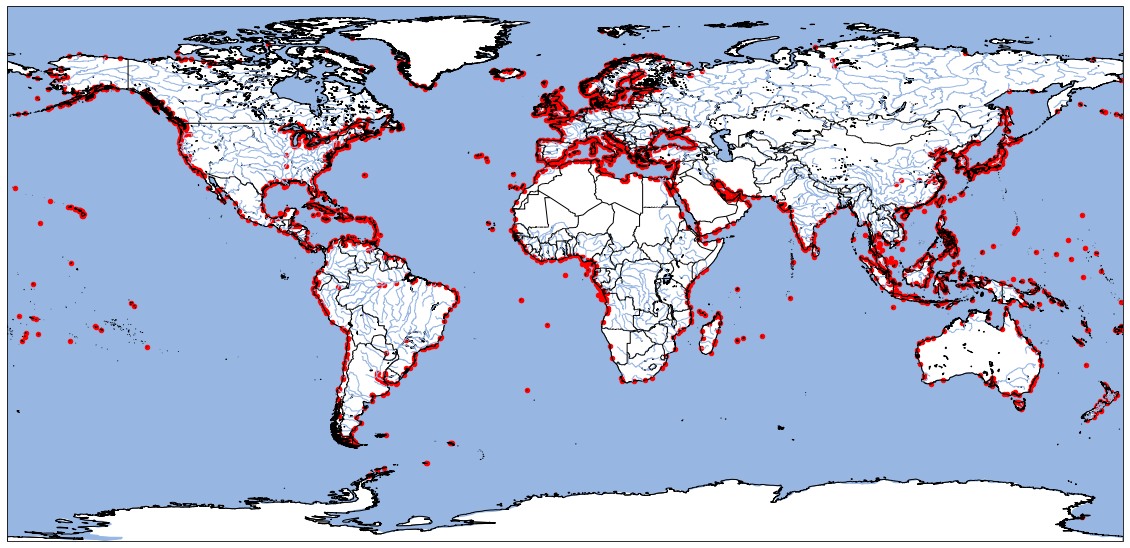

In [7]:
dfs_on_cartopymap([World_Port_Index],'LONGITUDE','LATITUDE',"red",20)